## Exploratory Data Analysis (EDA) ##


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) other variables such as Gender, Ethnicity, Parental level of education, Tasks and other factors affects the Lead Score Prediction whether Institution will get the student admitted or not so that target of institution is achieved to fill entire batch for a year


### 2) Data Collection
- Dataset Source - https://www.kaggle.com
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv(r'C:\Users\lenovo\OneDrive\Desktop\Intellipaat\LeadScorePrediction\Notebook\data.csv')

#### Show Top 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,Proposal Type,test_preparation_course,Website Lead,Social Media Lead,Referral Lead
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [5]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- proposal type : type of proposal (standard or free/reduced) 
- test preparation course : complete or not complete before test
- website lead
- social media lead
- referral lead

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
Proposal Type                  0
test_preparation_course        0
Website Lead                   0
Social Media Lead              0
Referral Lead                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   Proposal Type                1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   Website Lead                 1000 non-null   int64 
 6   Social Media Lead            1000 non-null   int64 
 7   Referral Lead                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
Proposal Type                   2
test_preparation_course         2
Website Lead                   81
Social Media Lead              72
Referral Lead                  77
dtype: int64

### 3.5 Check statistics of data set

In [10]:
df.describe()

,Website Lead,Social Media Lead,Referral Lead
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for website, for referral lead minimum is much higher = 10 and for social media yet higher = 17

### 3.7 Exploring Data

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,Proposal Type,test_preparation_course,Website Lead,Social Media Lead,Referral Lead
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental_level_of_education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'Proposal Type' variable:     ",end=" " )
print(df['Proposal Type'].unique())

print("Categories in 'test_preparation_course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'Proposal Type' variable:      ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:      ['none' 'completed']


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Website Lead', 'Social Media Lead', 'Referral Lead']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'Proposal Type', 'test_preparation_course']


In [14]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,Proposal Type,test_preparation_course,Website Lead,Social Media Lead,Referral Lead
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for "Total Score" and "Average"

In [20]:
df['total lead score'] = df['Website Lead'] + df['Social Media Lead'] + df['Referral Lead']
df['average lead score'] = df['total lead score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,Proposal Type,test_preparation_course,Website Lead,Social Media Lead,Referral Lead,total lead score,total_lead_score,average lead score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,229,76.333333


In [22]:
df.drop(columns='total_lead_score',inplace=True)

In [24]:
df.head()

,gender,race_ethnicity,parental_level_of_education,Proposal Type,test_preparation_course,Website Lead,Social Media Lead,Referral Lead,total lead score,average lead score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [28]:
website_full = df[df['Website Lead'] == 100]['average lead score'].count()
socialmedia_full = df[df['Social Media Lead'] == 100]['average lead score'].count()
referral_full = df[df['Referral Lead'] == 100]['average lead score'].count()

print(f'Number of students with website lead: {website_full}')
print(f'Number of students with social media lead: {socialmedia_full}')
print(f'Number of students with referral lead: {referral_full}')

Number of students with website lead: 7
Number of students with social media lead: 17
Number of students with referral lead: 14


In [29]:
website_less_20 = df[df['Website Lead'] <= 20]['average lead score'].count()
socialmedia_less_20 = df[df['Social Media Lead'] <= 20]['average lead score'].count()
referral_less_20 = df[df['Referral Lead'] <= 20]['average lead score'].count()

print(f'Number of students with less than 20% website lead: {website_less_20}')
print(f'Number of students with less than 20% social media lead: {socialmedia_less_20}')
print(f'Number of students with less than 20% referral lead: {referral_less_20}')

Number of students with less than 20% website lead: 4
Number of students with less than 20% social media lead: 1
Number of students with less than 20% referral lead: 3


#####  Insights
 - From above values we get students have worst lead score in website lead 
 - Best performance is in referral lead section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average lead score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

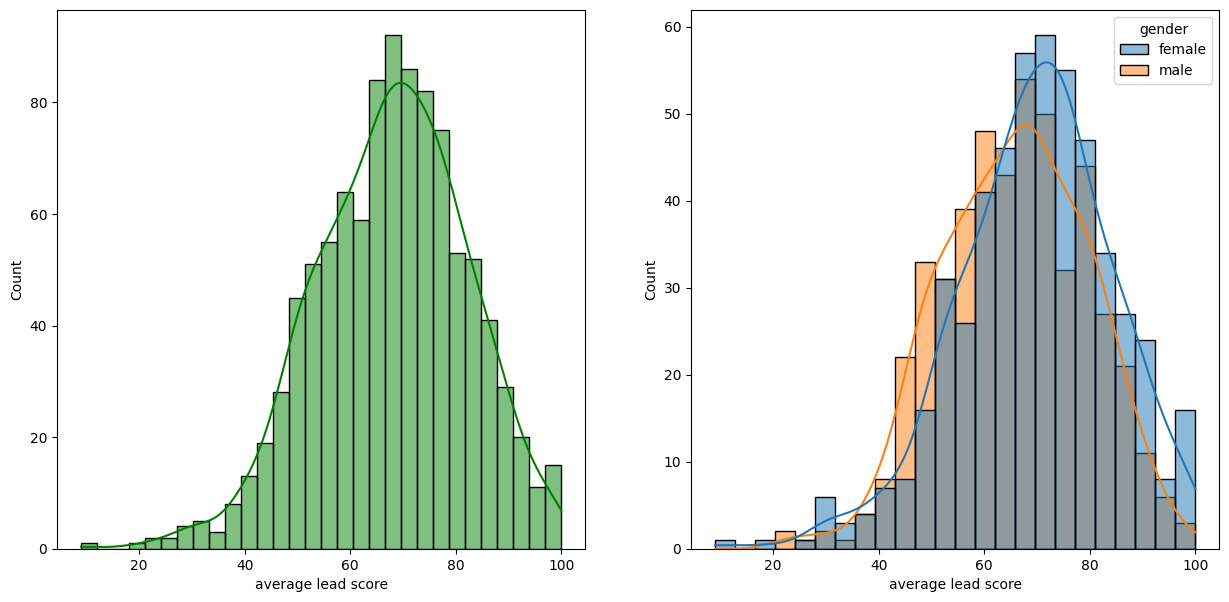

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average lead score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average lead score',kde=True,hue='gender')
plt.show()

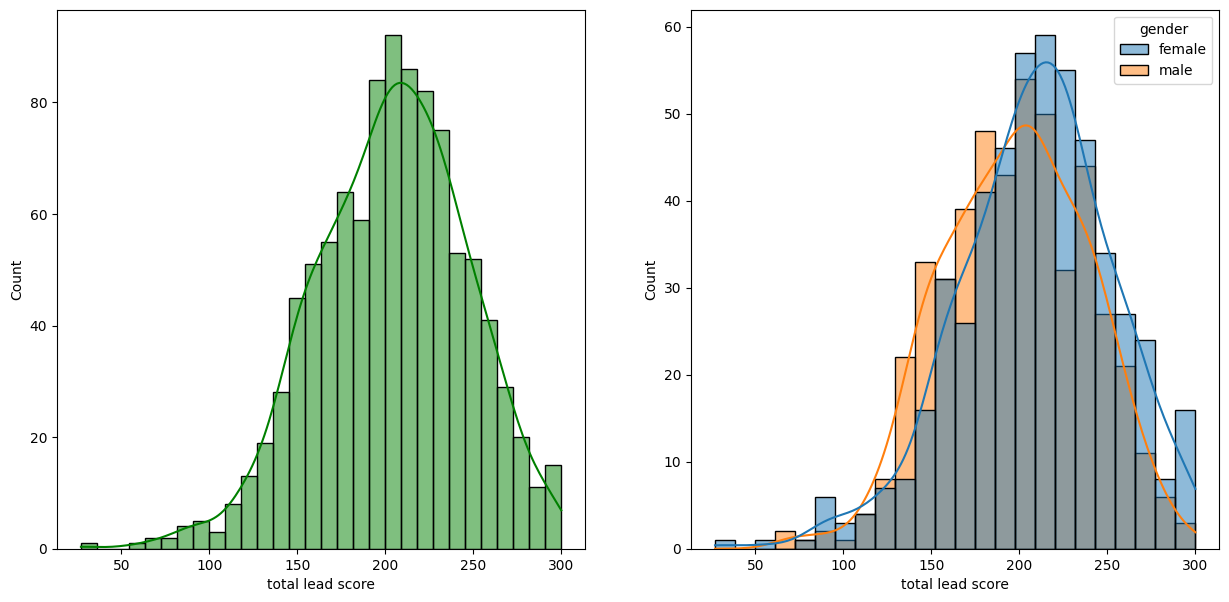

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total lead score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total lead score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

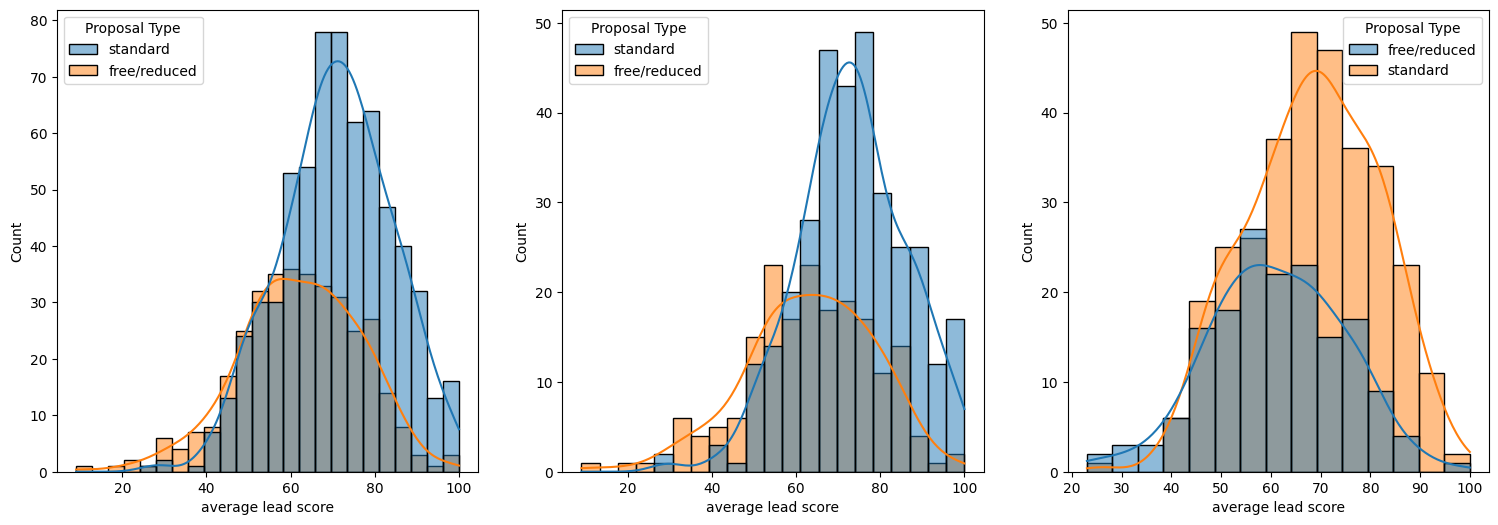

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average lead score',kde=True,hue='Proposal Type')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average lead score',kde=True,hue='Proposal Type')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average lead score',kde=True,hue='Proposal Type')
plt.show()

#####  Insights
- Standard Proposal Type helps perform well to get admitted
- Standard Proposal Type helps perform well get admitted be it a male or a female.

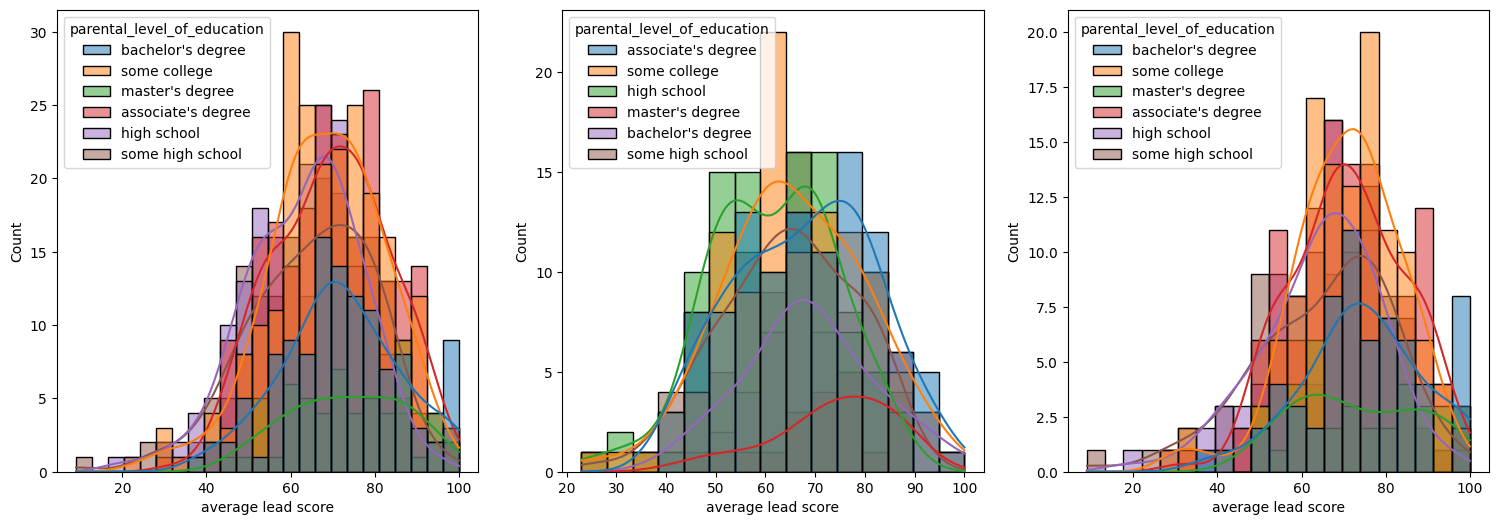

In [34]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average lead score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average lead score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average lead score',kde=True,hue='parental_level_of_education')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in and get admitted
- 3rd plot we can see there is no effect of parent's education on female students.

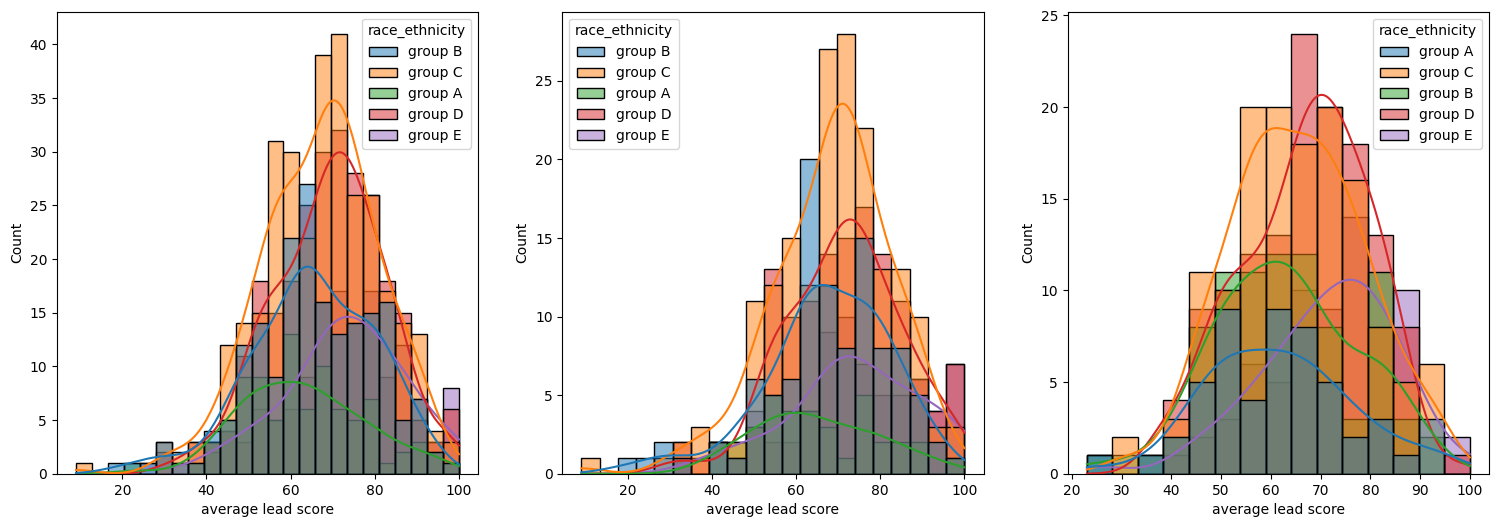

In [35]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average lead score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average lead score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average lead score',kde=True,hue='race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three leads i.e website,social media,referral

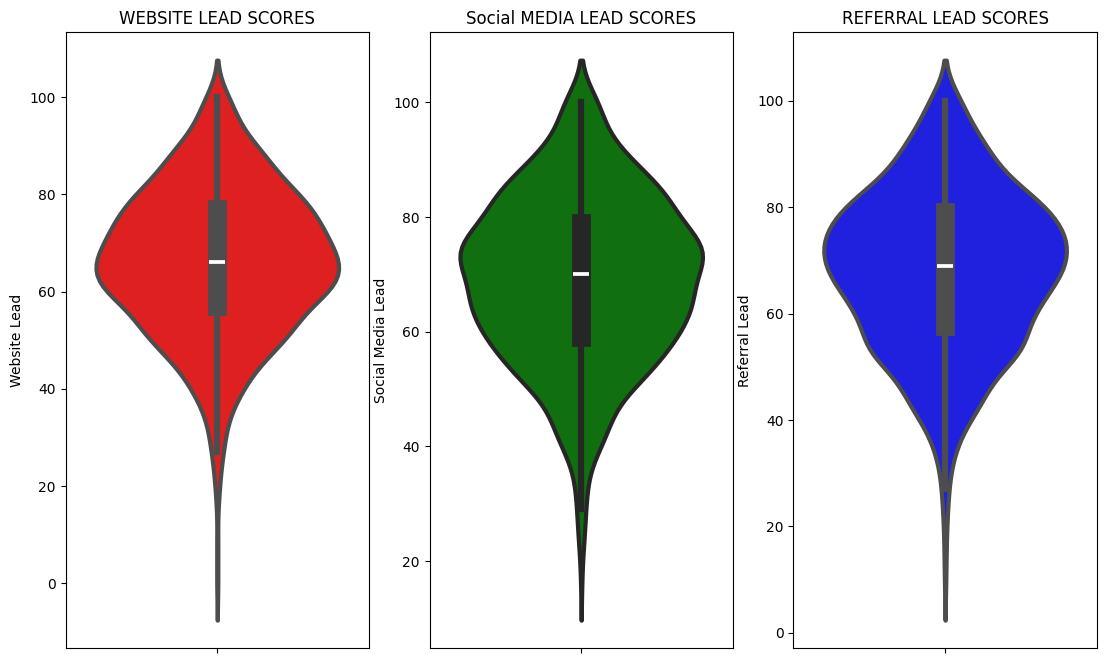

In [36]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('WEBSITE LEAD SCORES')
sns.violinplot(y='Website Lead',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Social MEDIA LEAD SCORES')
sns.violinplot(y='Social Media Lead',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('REFERRAL LEAD SCORES')
sns.violinplot(y='Referral Lead',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Website Leads whereas in Social Media and Referral lead most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

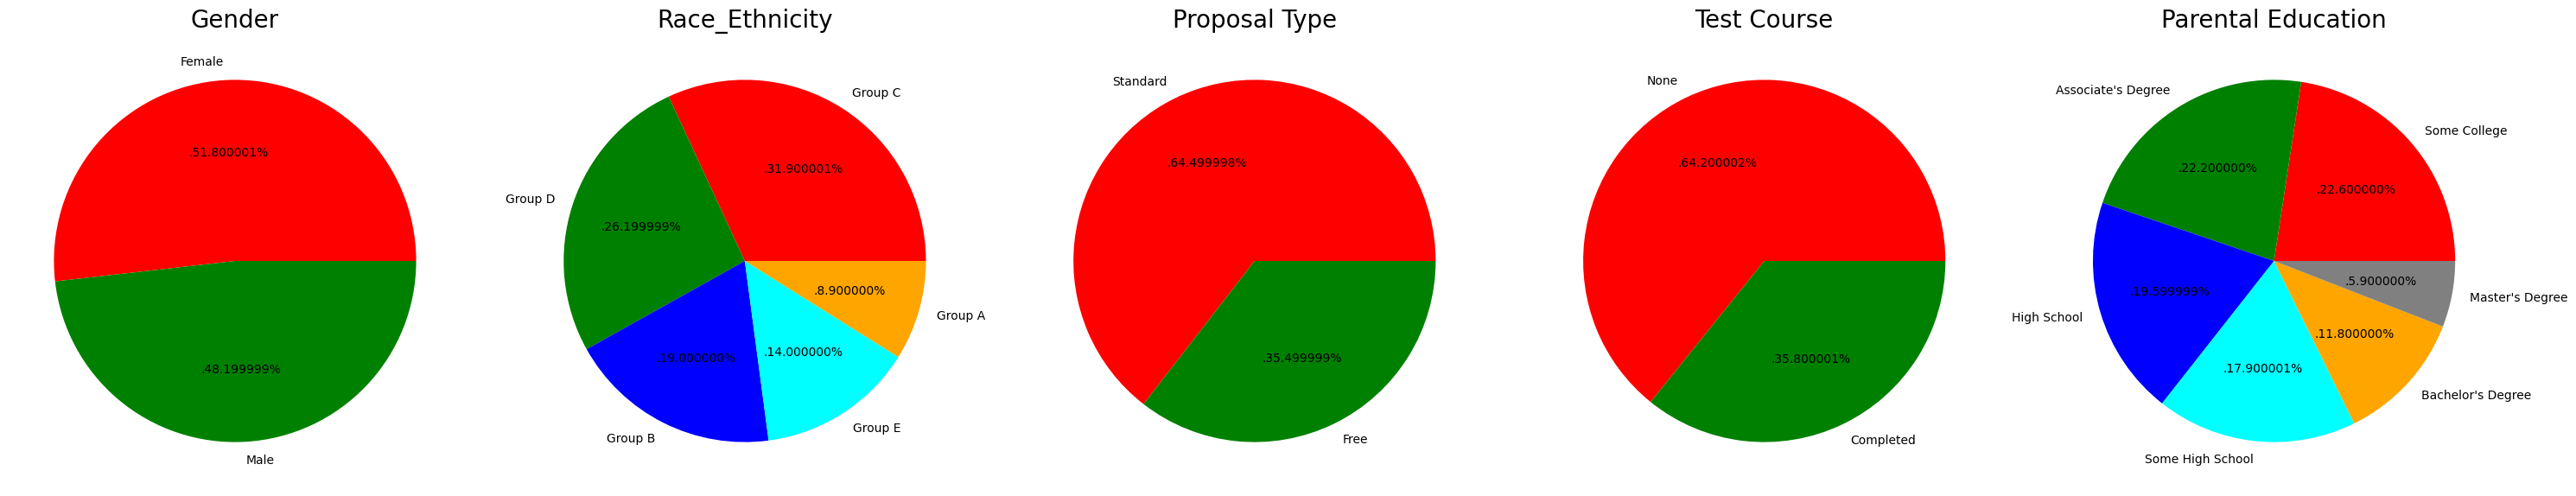

In [38]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['Proposal Type'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Proposal Type', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number of students are greatest in Group C
- Number of students who have standard proposal type are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

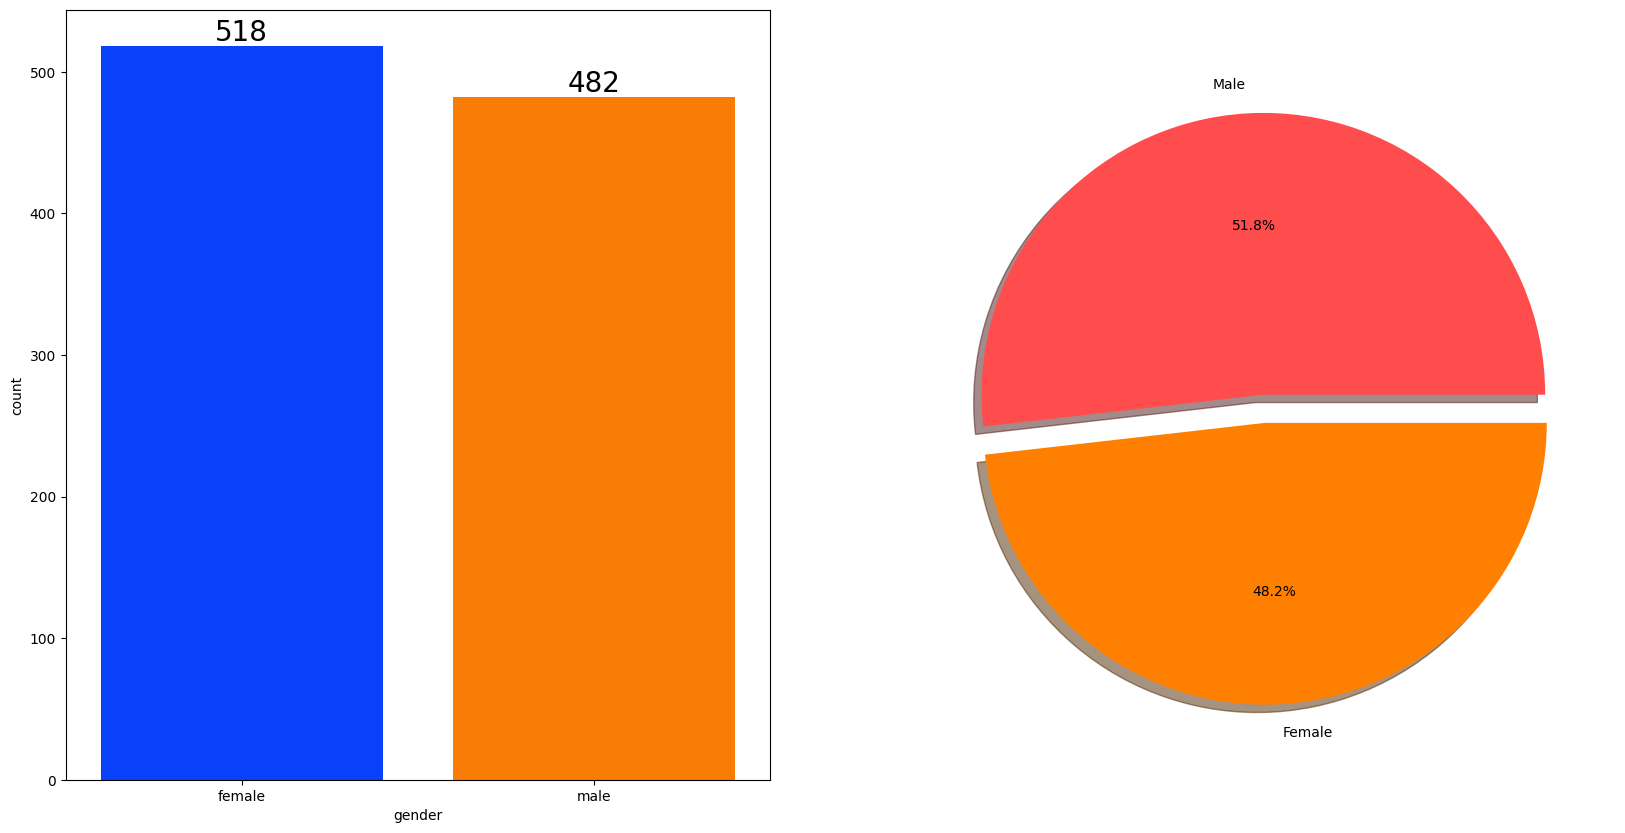

In [39]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### 4.4 CHECKING OUTLIERS

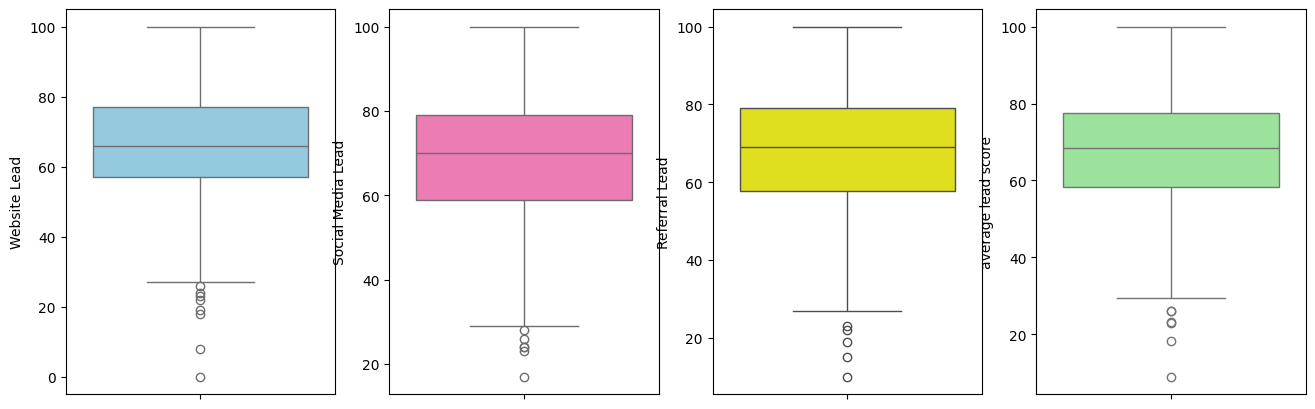

In [40]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['Website Lead'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['Social Media Lead'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['Referral Lead'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average lead score'],color='lightgreen')
plt.show()

#### 4.5 MUTIVARIATE ANALYSIS USING PAIRPLOT

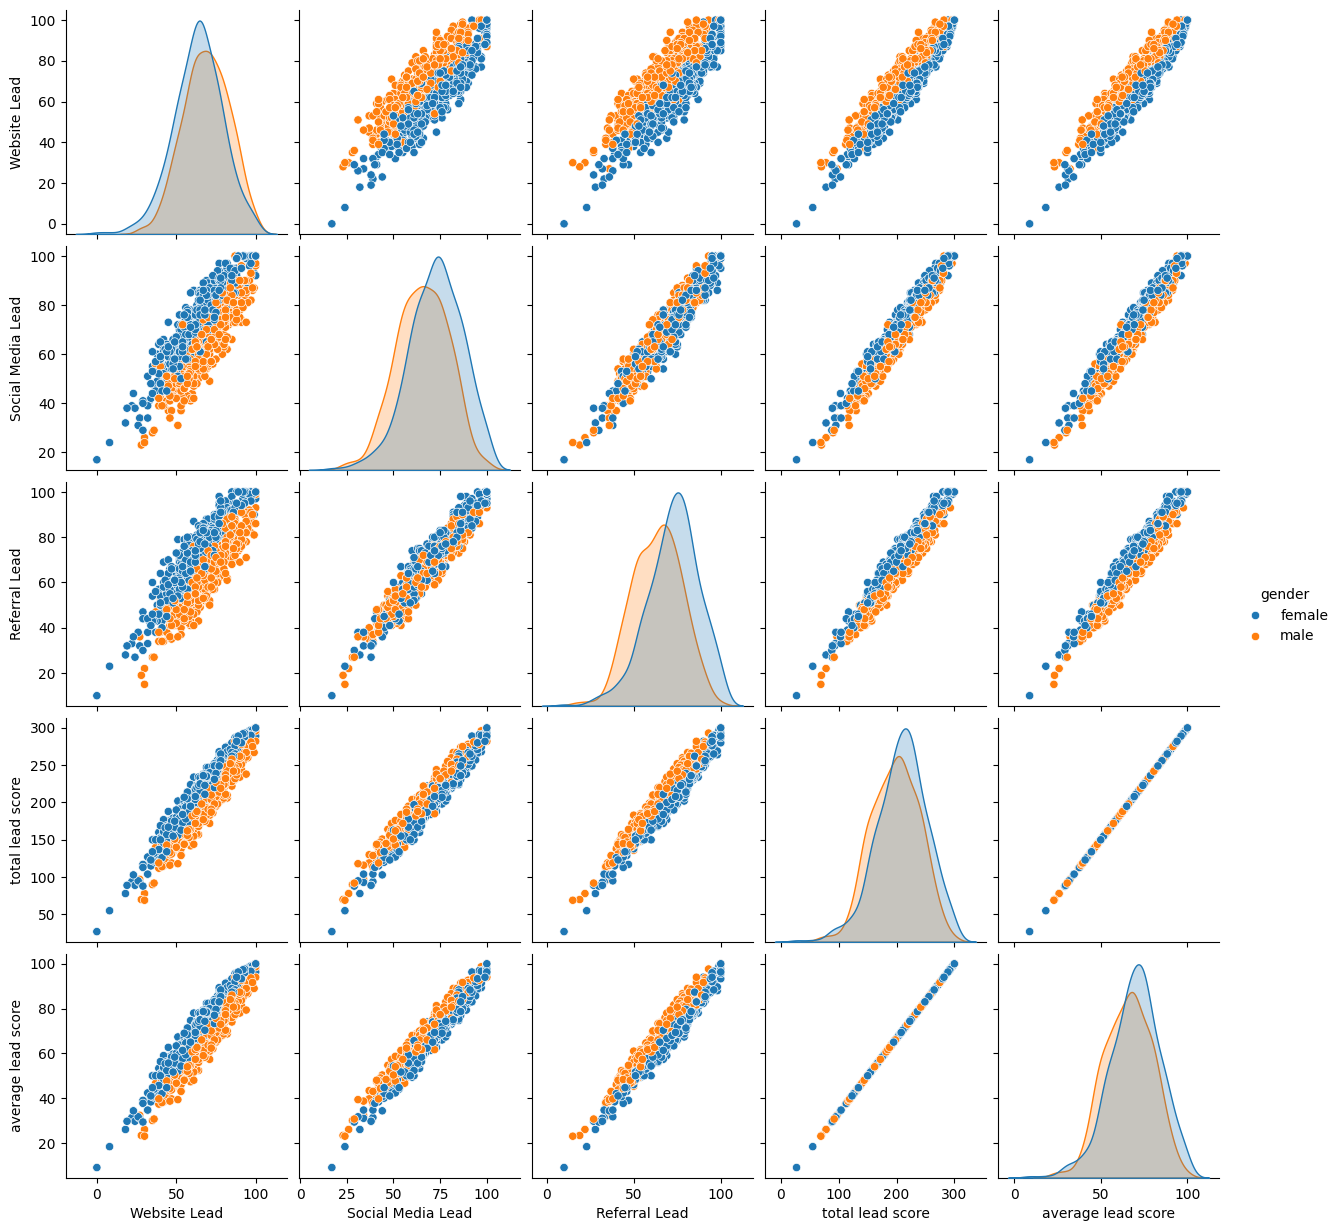

In [41]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with Proposal Type, race, parental level education
- Females lead in pass percentage and also are top lead scores
- Student's Performance is not much related with test preparation course
- Finishing preparation course is beneficial.